In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.metrics import precision_recall_fscore_support

In [2]:
df=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\train_ctrUa4K.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [8]:
df.shape

(614, 13)

In [9]:
print(df.columns.values)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


In [10]:
df=df.dropna()

In [11]:
df.shape

(480, 13)

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

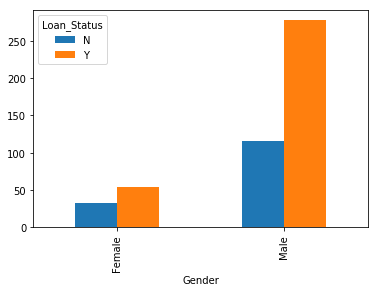

In [14]:
t1=pd.crosstab(df.Gender,df.Loan_Status)
t1.plot(kind='bar')

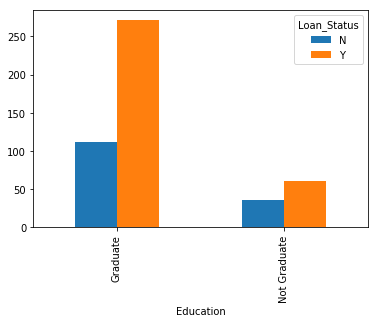

In [15]:
t2=pd.crosstab(df.Education,df.Loan_Status)
t2.plot(kind='bar')

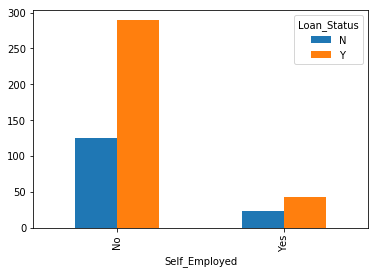

In [16]:
t4=pd.crosstab(df.Self_Employed,df.Loan_Status)
t4.plot(kind='bar')

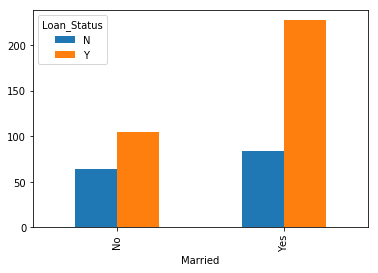

In [17]:
t5=pd.crosstab(df.Married,df.Loan_Status)
t5.plot(kind='bar')

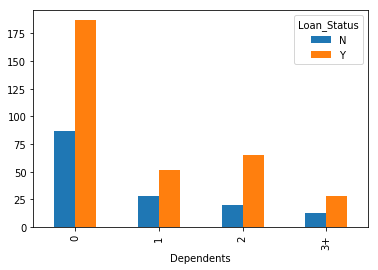

In [18]:
t3=pd.crosstab(df.Dependents,df.Loan_Status)
t3.plot(kind='bar')

In [19]:
df.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [20]:

mapping={'Male':0,'Female':1}
df['is_gender']=df['Gender'].map(mapping)

In [21]:

df.drop(['Gender'],axis=1,inplace=True)



In [22]:
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_gender
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0


In [23]:
mapping5={'0':0,'1':1,'2':2,'3+':3}
df['dep']=df['Dependents'].map(mapping5)

In [24]:
df.drop(['Dependents'],axis=1,inplace=True)

In [25]:
mapping6={'Urban':1,'Rural':0,'Semiurban':2}
df['area']=df['Property_Area'].map(mapping6)

In [26]:
df.drop(['Property_Area'],axis=1,inplace=True)

In [27]:
mapping2={'Yes':1,'No':0}
df['married']=df['Married'].map(mapping2)

In [28]:
df.drop(['Married'],axis=1,inplace=True)

In [29]:
df.head()


,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_gender,dep,area,married
1,LP001003,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1
2,LP001005,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,0,1,1
3,LP001006,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,0,1,1
4,LP001008,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,0,1,0
5,LP001011,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,0,2,1,1


In [30]:
mapping3={'Graduate':1,'Not Graduate':0}
df['education']=df['Education'].map(mapping3)

In [31]:
df.drop(['Education'],axis=1,inplace=True)

In [32]:
df.head()

,Loan_ID,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_gender,dep,area,married,education
1,LP001003,No,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1
2,LP001005,Yes,3000,0.0,66.0,360.0,1.0,Y,0,0,1,1,1
3,LP001006,No,2583,2358.0,120.0,360.0,1.0,Y,0,0,1,1,0
4,LP001008,No,6000,0.0,141.0,360.0,1.0,Y,0,0,1,0,1
5,LP001011,Yes,5417,4196.0,267.0,360.0,1.0,Y,0,2,1,1,1


In [33]:
mapping4={'Yes':1,'No':0}

df['selfemp']=df['Self_Employed'].map(mapping4)

In [34]:
df.drop(['Self_Employed'],axis=1,inplace=True)

In [35]:
df.head()



,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_gender,dep,area,married,education,selfemp
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,0,0,1,1,1,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,0,0,1,1,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,0,0,1,0,1,0
5,LP001011,5417,4196.0,267.0,360.0,1.0,Y,0,2,1,1,1,1


In [36]:
mapping1={'Y':0,'N':1}
df['is_loans']=df['Loan_Status'].map(mapping1)

In [37]:
df.drop(['Loan_Status'],axis=1,inplace=True)

In [38]:
df.head()


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_gender,dep,area,married,education,selfemp,is_loans
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1
2,LP001005,3000,0.0,66.0,360.0,1.0,0,0,1,1,1,1,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,0,0,1,0,1,0,0
5,LP001011,5417,4196.0,267.0,360.0,1.0,0,2,1,1,1,1,0


In [39]:
c=df.corr()
print(c)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   
is_gender                -0.032644          -0.156171   -0.098975   
dep                       0.131139          -0.000318    0.172780   
area                     -0.024586          -0.004348   -0.039807   
married                   0.036717           0.102950    0.183442   
education                 0.131172           0.074499    0.172780   
selfemp                   0.170785          -0.001509    0.120389   
is_loans                  0.043152           0.049020    0.071753   

                   Loan_Amount_Term  Credit_History  is_gender       dep  \
ApplicantIncome           

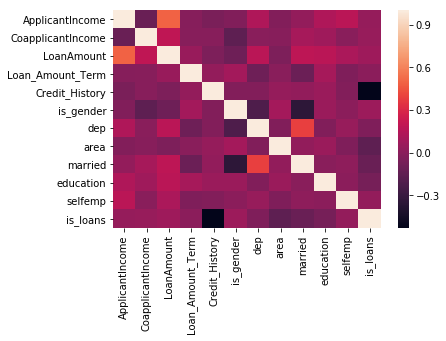

In [40]:
sns.heatmap(c)

In [41]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [42]:
df.shape


(480, 12)

In [43]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_gender,dep,area,married,education,selfemp,is_loans
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1
2,3000,0.0,66.0,360.0,1.0,0,0,1,1,1,1,0
3,2583,2358.0,120.0,360.0,1.0,0,0,1,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,0,0,1,0,1,0,0
5,5417,4196.0,267.0,360.0,1.0,0,2,1,1,1,1,0


In [44]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_gender,dep,area,married,education,selfemp,is_loans
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,3,0,1,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,1,1,1,0,0
612,7583,0.0,187.0,360.0,1.0,0,2,1,1,1,0,0
613,4583,0.0,133.0,360.0,0.0,1,0,2,0,1,1,1


In [45]:
df.shape

(480, 12)

In [46]:
x=df.iloc[:,0:10].values

In [47]:
y=df.iloc[:,11]

In [48]:
y

1      1
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      1
10     0
12     0
13     1
14     0
15     0
17     1
18     1
20     1
21     0
22     1
25     0
26     0
27     0
28     1
31     1
32     1
33     0
34     1
37     0
38     0
39     0
      ..
575    0
577    0
578    0
580    0
581    1
582    0
584    1
585    1
586    0
587    0
589    1
590    0
591    1
593    0
594    0
595    0
596    1
598    0
599    0
602    0
603    0
604    0
606    0
607    0
608    0
609    0
610    0
611    0
612    0
613    1
Name: is_loans, Length: 480, dtype: int64

In [49]:

from sklearn.ensemble import RandomForestClassifier as rf

In [50]:
random=rf(n_estimators=1000,random_state=1)
random.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [51]:
df_test=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\test_lAUu6dG.csv')

In [52]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [53]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [54]:
df_test.drop(['Loan_ID'],axis=1,inplace=True)

In [55]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.6+ KB


In [57]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [58]:
df_test.count()

Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

In [59]:
df_test=df_test.dropna()

In [60]:
df_test.shape

(289, 11)

In [61]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [62]:

mapping={'Male':0,'Female':1}
df_test['is_gender']=df_test['Gender'].map(mapping)

df_test.drop(['Gender'],axis=1,inplace=True)



In [63]:
df_test.head()


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,is_gender
0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
4,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
5,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,0


In [64]:
mapping5={'0':0,'1':1,'2':2,'3+':3}
df_test['dep']=df_test['Dependents'].map(mapping5)
df_test.drop(['Dependents'],axis=1,inplace=True)

In [65]:
df_test.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,is_gender,dep
0,Yes,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0,0
1,Yes,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0,1
2,Yes,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0,2
4,No,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0,0
5,Yes,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,0,0


In [66]:
mapping6={'Urban':1,'Rural':0,'Semiurban':2}
df_test['area']=df_test['Property_Area'].map(mapping6)
df_test.drop(['Property_Area'],axis=1,inplace=True)

In [67]:
df_test.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_gender,dep,area
0,Yes,Graduate,No,5720,0,110.0,360.0,1.0,0,0,1
1,Yes,Graduate,No,3076,1500,126.0,360.0,1.0,0,1,1
2,Yes,Graduate,No,5000,1800,208.0,360.0,1.0,0,2,1
4,No,Not Graduate,No,3276,0,78.0,360.0,1.0,0,0,1
5,Yes,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,0,0,1


In [68]:
mapping2={'Yes':1,'No':0}
df_test['married']=df_test['Married'].map(mapping2)
df_test.drop(['Married'],axis=1,inplace=True)

In [69]:
df_test.head()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_gender,dep,area,married
0,Graduate,No,5720,0,110.0,360.0,1.0,0,0,1,1
1,Graduate,No,3076,1500,126.0,360.0,1.0,0,1,1,1
2,Graduate,No,5000,1800,208.0,360.0,1.0,0,2,1,1
4,Not Graduate,No,3276,0,78.0,360.0,1.0,0,0,1,0
5,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,0,0,1,1


In [70]:
mapping3={'Graduate':1,'Not Graduate':0}
df_test['education']=df_test['Education'].map(mapping3)
df_test.drop(['Education'],axis=1,inplace=True)

In [71]:
df_test.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_gender,dep,area,married,education
0,No,5720,0,110.0,360.0,1.0,0,0,1,1,1
1,No,3076,1500,126.0,360.0,1.0,0,1,1,1,1
2,No,5000,1800,208.0,360.0,1.0,0,2,1,1,1
4,No,3276,0,78.0,360.0,1.0,0,0,1,0,0
5,Yes,2165,3422,152.0,360.0,1.0,0,0,1,1,0


In [72]:
mapping4={'Yes':1,'No':0}

df_test['selfemp']=df_test['Self_Employed'].map(mapping4)
df_test.drop(['Self_Employed'],axis=1,inplace=True)

In [73]:
x=df_test.drop(['selfemp'],axis=1)

In [74]:
df_test.shape

(289, 11)

In [75]:
x_test=df_test.iloc[:,0:10]

from sklearn import metrics

In [76]:
#y_test=df.selfemp

In [90]:
y_test=sample['is_loans'].iloc[0:289].values

In [91]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [92]:
print(metrics.confusion_matrix(y_test, y_predict))

[[  0   0]
 [232  57]]


In [93]:
y_predict

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [82]:
len(y_predict)

289

In [81]:
y_predict=random.predict(x_test)

In [395]:
x.shape

(480, 10)

In [396]:
y.shape

(480,)

In [397]:
y_test.shape

(480,)

In [398]:
x_test.shape


(289, 10)

In [399]:
y_predict.shape

(289,)

In [79]:
sample=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\sample_submission_49d68Cx.csv')

In [115]:
sample.dropna()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,N
8,LP001059,N
9,LP001067,N


In [114]:
sample['Loan_Status']

0      N
1      N
2      N
3      N
4      N
5      N
6      N
7      N
8      N
9      N
10     N
11     N
12     N
13     N
14     N
15     N
16     N
17     N
18     N
19     N
20     N
21     N
22     N
23     N
24     N
25     N
26     N
27     N
28     N
29     N
      ..
337    N
338    N
339    N
340    N
341    N
342    N
343    N
344    N
345    N
346    N
347    N
348    N
349    N
350    N
351    N
352    N
353    N
354    N
355    N
356    N
357    N
358    N
359    N
360    N
361    N
362    N
363    N
364    N
365    N
366    N
Name: Loan_Status, Length: 367, dtype: object

In [85]:
sample['Loan_Status'].value_counts()

N    367
Name: Loan_Status, dtype: int64

In [86]:
submission=sample['Loan_Status']

In [87]:
mapping1={'Y':0,'N':1}
sample['is_loans']=sample['Loan_Status'].map(mapping1)

In [88]:
y_test=sample['is_loans']

In [89]:
sample.head()

,Loan_ID,Loan_Status,is_loans
0,LP001015,N,1
1,LP001022,N,1
2,LP001031,N,1
3,LP001035,N,1
4,LP001051,N,1


In [405]:
len(sample.Loan_Status)

367

In [126]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [82]:
X = df.drop('is_loans', 1)
Y = df.is_loans

In [84]:

X.shape, df.shape, df_test.shape

((480, 11), (480, 12), (289, 11))